In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
file_path = r'C:\Users\tirth\Downloads\612\Database\Database\world_population(in).csv'


try:
    data = pd.read_csv(file_path , encoding='cp1252')
    
    # Display the first few rows to understand the structure
    print("Dataset preview:")
    print(data.head())

    # Check if the 'Population' column exists
    if 'Population' in data.columns:
        # Ensure 'Population' is numeric
        data['Population'] = data['Population'].replace(',', '', regex=True).astype(float)
        # Handle missing data
        data['Population'] = data['Population'].fillna(0)
        
        # Calculate the total population
        total_population = data['Population'].sum()
        print(f"The total population of all regions/countries is: {total_population:,.0f}")
    else:
        print("The dataset does not contain a 'Population' column.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Dataset preview:
   Rank Country_Code Country/Territory           Capital      Continent  \
0     1          CHN             China           Beijing           Asia   
1     2          IND             India         New Delhi           Asia   
2     3          USA     United States  Washington, D.C.  North America   
3     4          IDN         Indonesia           Jakarta           Asia   
4     5          PAK          Pakistan         Islamabad           Asia   

   Population_2022  Population_2020  Population_2015  Population_2010  \
0       1425887337       1424929781       1393715448       1348191368   
1       1417173173       1396387127       1322866505       1240613620   
2        338289857        335942003        324607776        311182845   
3        275501339        271857970        259091970        244016173   
4        235824862        227196741        210969298        194454498   

   Population_2000  Population_1990  Population_1980  Population_1970  \
0       1264099069  

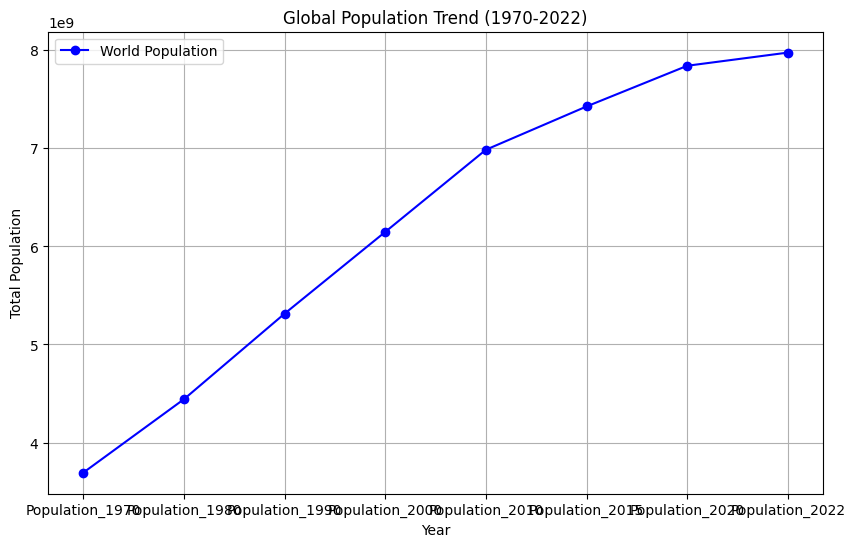

In [9]:

# Calculate total world population for each decade
decades = ['Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Population_2015', 'Population_2020', 'Population_2022']
world_population = data[decades].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(decades, world_population, marker='o', color='blue', label='World Population')
plt.title('Global Population Trend (1970-2022)')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.grid(True)
plt.legend()
plt.show()


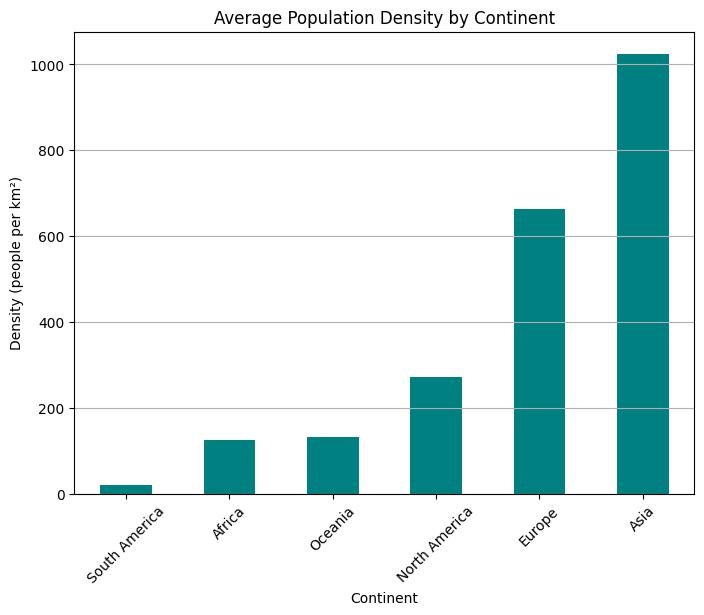

In [10]:
# Group by continent and calculate average density
continent_density = data.groupby('Continent')['Density_per_km²'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
continent_density.sort_values().plot(kind='bar', color='teal')
plt.title('Average Population Density by Continent')
plt.xlabel('Continent')
plt.ylabel('Density (people per km²)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


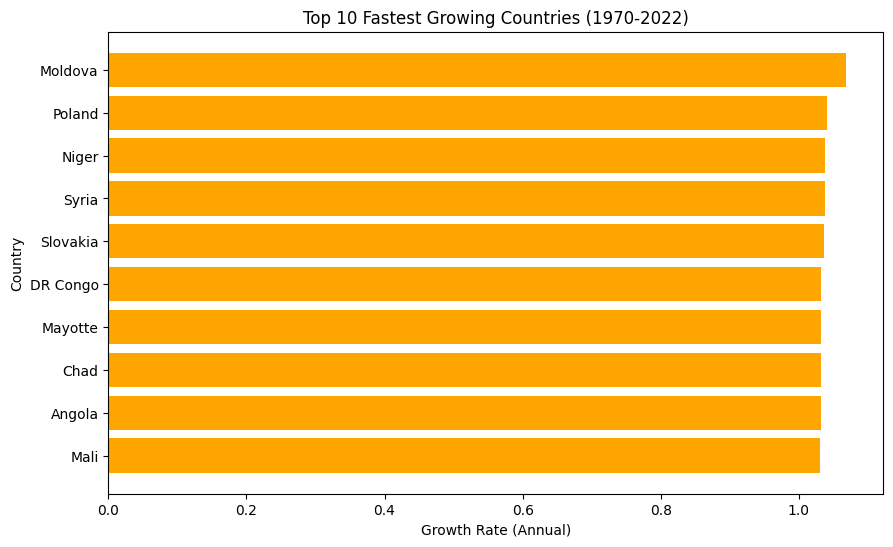

In [11]:
# Sort countries by Growth_Rate
fastest_growing = data.nlargest(10, 'Growth_Rate')

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(fastest_growing['Country/Territory'], fastest_growing['Growth_Rate'], color='orange')
plt.title('Top 10 Fastest Growing Countries (1970-2022)')
plt.xlabel('Growth Rate (Annual)')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


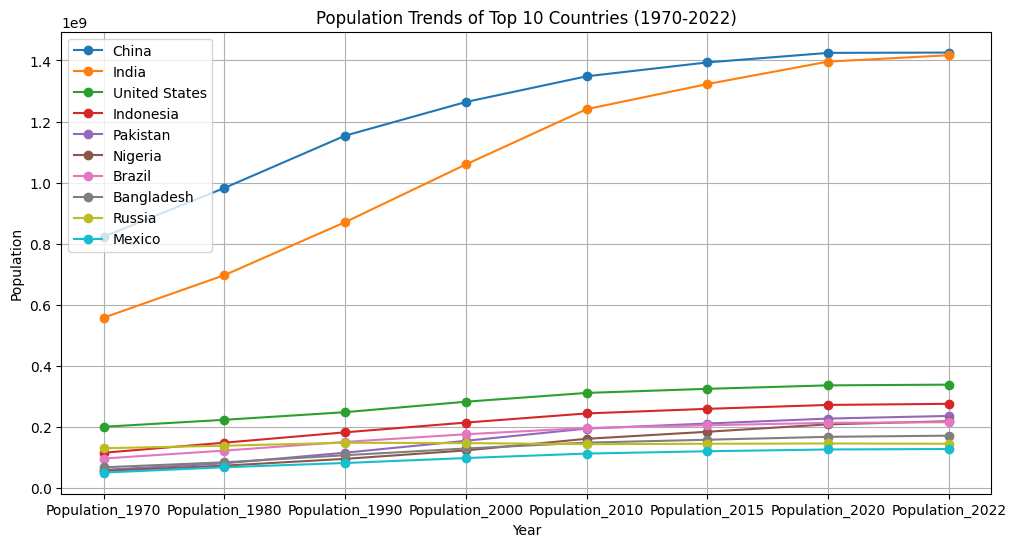

In [12]:
# Top 10 countries by Population_2022
top10_population = data.nlargest(10, 'Population_2022')

# Plot population trends over decades for the top 10 countries
plt.figure(figsize=(12, 6))
for _, row in top10_population.iterrows():
    plt.plot(decades, row[decades], marker='o', label=row['Country/Territory'])

plt.title('Population Trends of Top 10 Countries (1970-2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


C:\Users\tirth\AppData\Local\Temp\ipykernel_1932\2165970420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asian_countries['Growth_2000_2022'] = asian_countries['Population_2022'] - asian_countries['Population_2000']


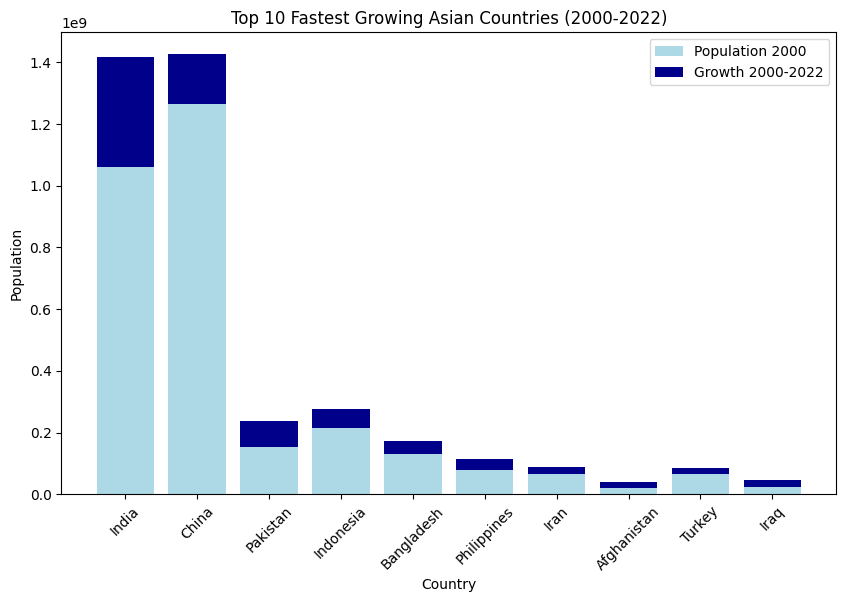

In [13]:
# Filter Asian countries
asian_countries = data[data['Continent'] == 'Asia']

# Calculate growth from 2000 to 2022
asian_countries['Growth_2000_2022'] = asian_countries['Population_2022'] - asian_countries['Population_2000']

# Get top 10 fastest-growing Asian countries
fastest_growing_asian = asian_countries.nlargest(10, 'Growth_2000_2022')

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(fastest_growing_asian['Country/Territory'], fastest_growing_asian['Population_2000'], label='Population 2000', color='lightblue')
plt.bar(fastest_growing_asian['Country/Territory'], fastest_growing_asian['Growth_2000_2022'], bottom=fastest_growing_asian['Population_2000'], label='Growth 2000-2022', color='darkblue')
plt.title('Top 10 Fastest Growing Asian Countries (2000-2022)')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend()
plt.show()


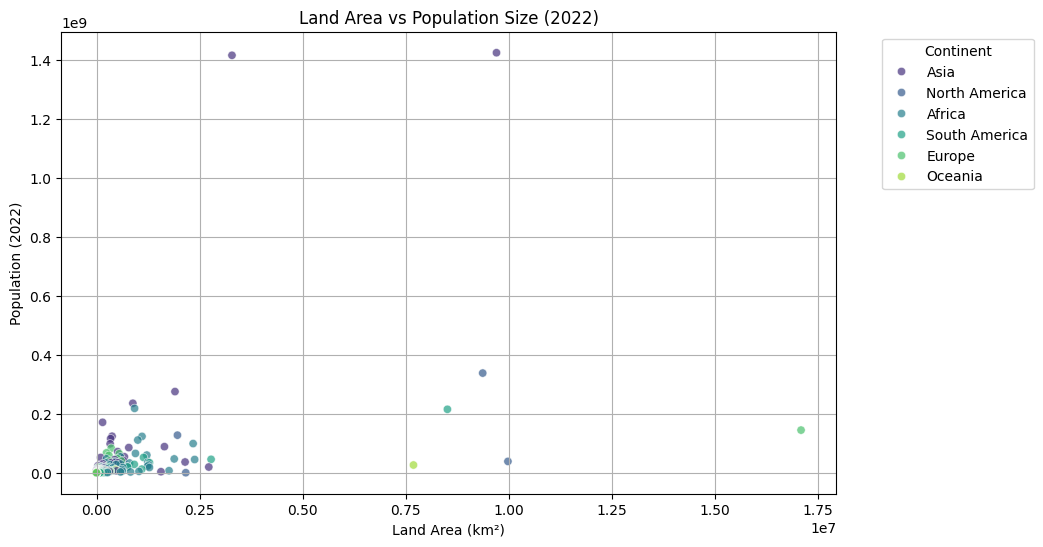

In [14]:
import seaborn as sns

# Scatter plot for land area vs. population
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Area_km²'], y=data['Population_2022'], hue=data['Continent'], palette='viridis', alpha=0.7)
plt.title('Land Area vs Population Size (2022)')
plt.xlabel('Land Area (km²)')
plt.ylabel('Population (2022)')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()s


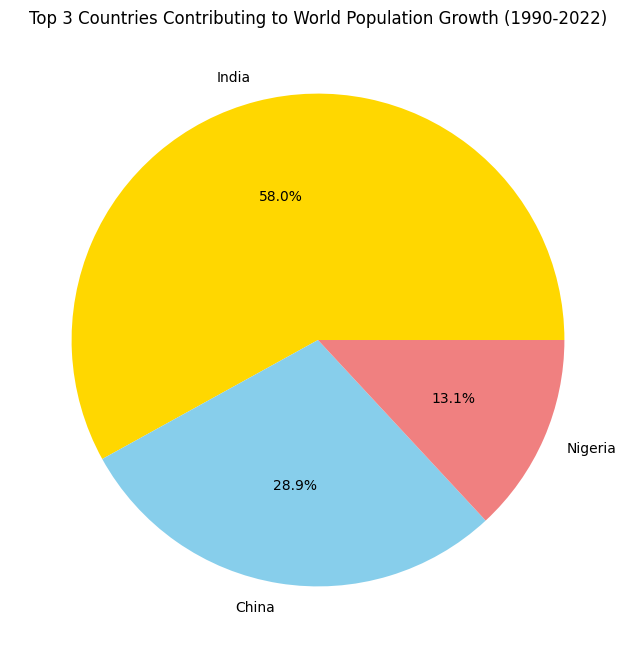

In [15]:
# Calculate population growth between 1990 and 2022
data['Growth_1990_2022'] = data['Population_2022'] - data['Population_1990']

# Top 3 countries contributing to population growth
top3_growth = data.nlargest(3, 'Growth_1990_2022')

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top3_growth['Growth_1990_2022'], labels=top3_growth['Country/Territory'], autopct='%1.1f%%', colors=['gold', 'skyblue', 'lightcoral'])
plt.title('Top 3 Countries Contributing to World Population Growth (1990-2022)')
plt.show()


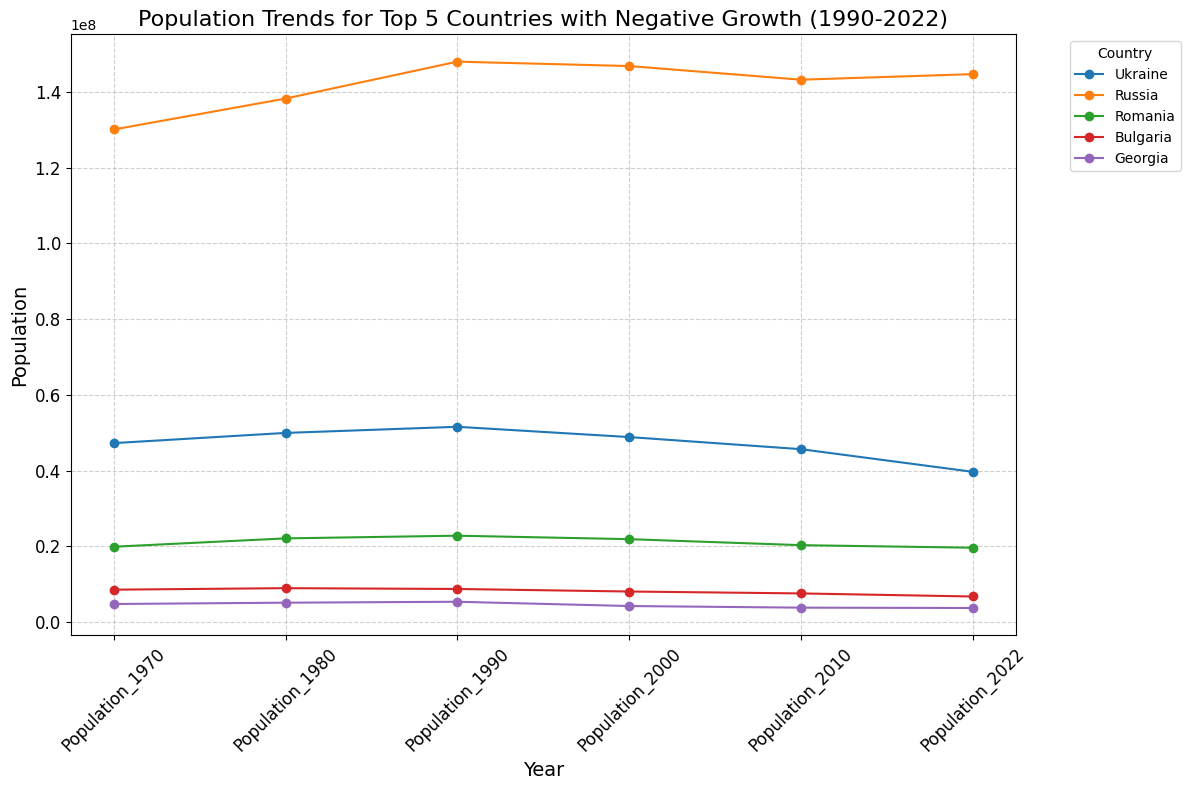

In [17]:
# Sort by the most significant population decrease
top_shrinking_countries = shrinking_countries.nsmallest(5, 'Growth_1990_2022')

# Select years for the x-axis
years = ['Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Population_2022']

# Plot trends for selected countries
plt.figure(figsize=(12, 8))
for _, row in top_shrinking_countries.iterrows():
    plt.plot(years, row[years], marker='o', label=row['Country/Territory'])

plt.title('Population Trends for Top 5 Countries with Negative Growth (1990-2022)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



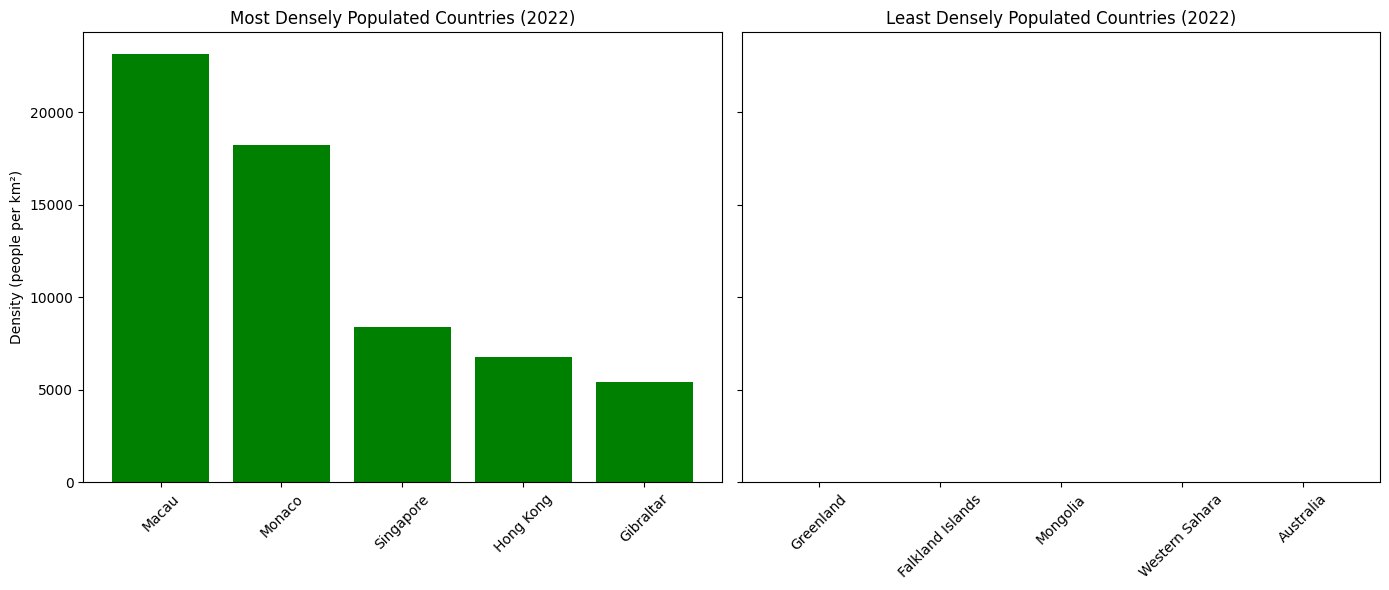

NameError: name 'df' is not defined

In [22]:
# Identify most and least densely populated countries in 2022
most_dense = data.nlargest(5, 'Density_per_km²')
least_dense = data.nsmallest(5, 'Density_per_km²')

# Bar chart for most and least dense countries
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Most dense countries
axes[0].bar(most_dense['Country/Territory'], most_dense['Density_per_km²'], color='green')
axes[0].set_title('Most Densely Populated Countries (2022)')
axes[0].set_ylabel('Density (people per km²)')
axes[0].tick_params(axis='x', rotation=45)

# Least dense countries
axes[1].bar(least_dense['Country/Territory'], least_dense['Density_per_km²'], color='red')
axes[1].set_title('Least Densely Populated Countries (2022)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
# Top 10 countries by density
top_density_countries = df.nlargest(10, 'Density_per_km²')[['Country/Territory', 'Density_per_km²', 'Population_2022']]

# Plot bubble chart
plt.figure(figsize=(12, 8))
plt.scatter(
    top_density_countries['Country/Territory'],
    top_density_countries['Density_per_km²'],
    s=top_density_countries['Population_2022'] / 1e6,  # Scale bubble size
    alpha=0.6,
    color='orange',
    edgecolor='black'
)
plt.title('Top 10 Most Densely Populated Countries (2022)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Density (people per km²)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [40]:
import pandas as pd

# Load the CSV file into the DataFrame with a different encoding
file_path = r'C:\Users\tirth\Downloads\612\Database\Database\world_population(in).csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # or try 'latin1'

# Verify the DataFrame is loaded correctly
print(df.head())  # Check the first few rows of the data


   Rank Country_Code Country/Territory           Capital      Continent  \
0     1          CHN             China           Beijing           Asia   
1     2          IND             India         New Delhi           Asia   
2     3          USA     United States  Washington, D.C.  North America   
3     4          IDN         Indonesia           Jakarta           Asia   
4     5          PAK          Pakistan         Islamabad           Asia   

   Population_2022  Population_2020  Population_2015  Population_2010  \
0       1425887337       1424929781       1393715448       1348191368   
1       1417173173       1396387127       1322866505       1240613620   
2        338289857        335942003        324607776        311182845   
3        275501339        271857970        259091970        244016173   
4        235824862        227196741        210969298        194454498   

   Population_2000  Population_1990  Population_1980  Population_1970  \
0       1264099069       1153704252  

C:\Users\tirth\AppData\Local\Temp\ipykernel_1932\1903299250.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_growth_countries_2010_2020, x='Country/Territory', y='Growth_Rate_2010_2020', palette='coolwarm')


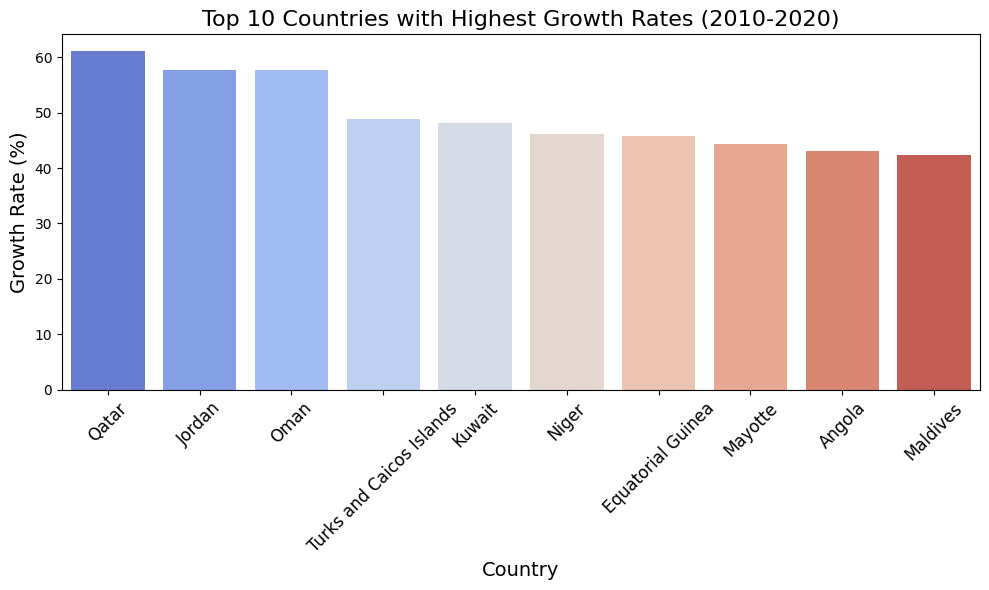

In [41]:
# Calculate population growth rate from 2010 to 2020
df['Growth_Rate_2010_2020'] = ((df['Population_2020'] - df['Population_2010']) / df['Population_2010']) * 100

# Get the top 10 countries with the highest growth rate in the last decade
top_growth_countries_2010_2020 = df.nlargest(10, 'Growth_Rate_2010_2020')[['Country/Territory', 'Growth_Rate_2010_2020']]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_growth_countries_2010_2020, x='Country/Territory', y='Growth_Rate_2010_2020', palette='coolwarm')
plt.title('Top 10 Countries with Highest Growth Rates (2010-2020)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Growth Rate (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


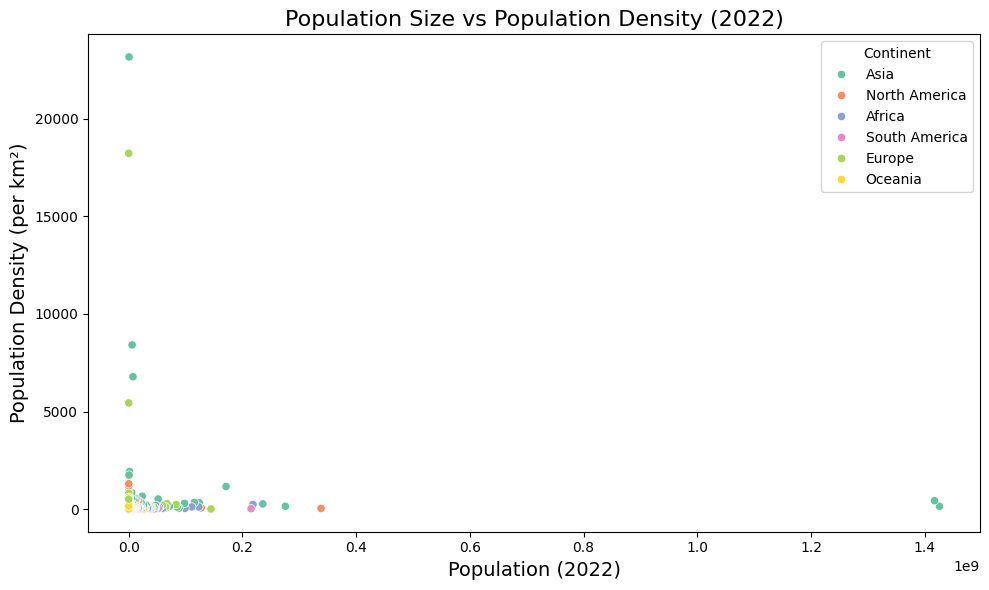

In [42]:
# Scatter plot for population size vs population density
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Population_2022', y='Density_per_km²', hue='Continent', palette='Set2')
plt.title('Population Size vs Population Density (2022)', fontsize=16)
plt.xlabel('Population (2022)', fontsize=14)
plt.ylabel('Population Density (per km²)', fontsize=14)
plt.tight_layout()
plt.show()


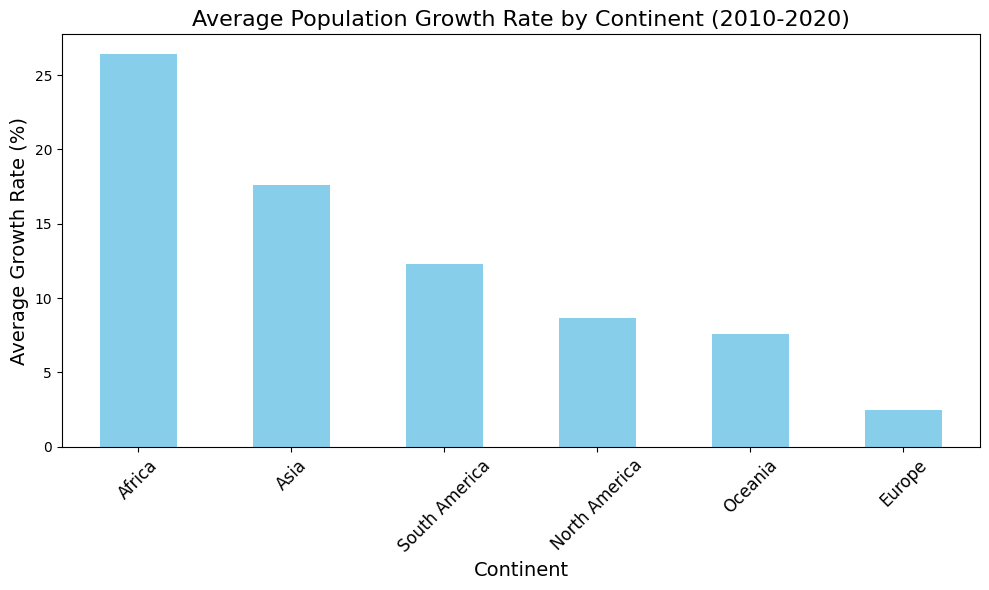

In [43]:
# Calculate average growth rate for each continent
continent_growth_rate = df.groupby('Continent')['Growth_Rate_2010_2020'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
continent_growth_rate.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Population Growth Rate by Continent (2010-2020)', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Average Growth Rate (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\tirth\AppData\Local\Temp\ipykernel_1932\2113722887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Continent', y='Density_per_km²', palette='muted')


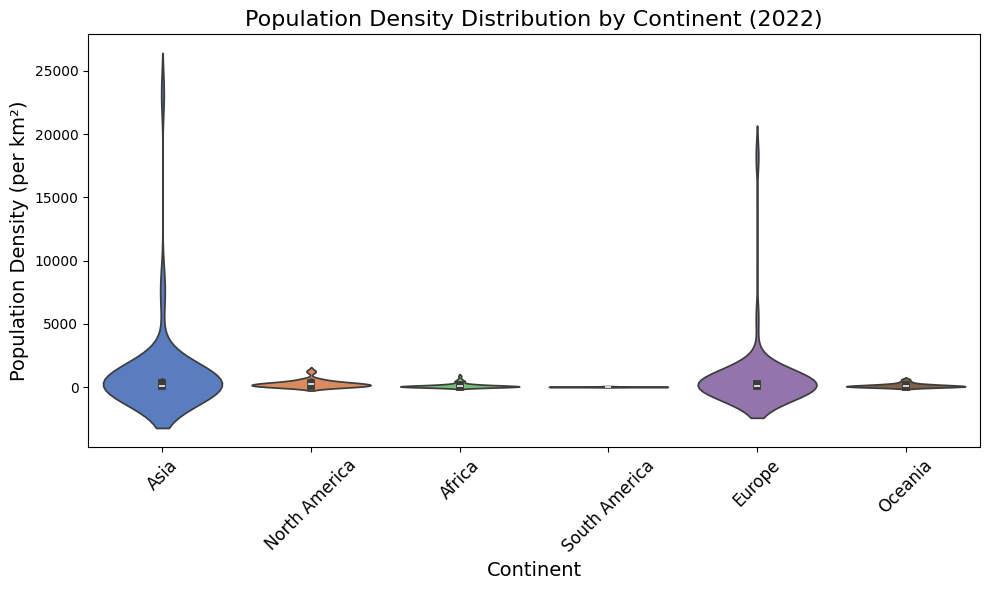

In [44]:
# Violin plot for population density by continent
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Continent', y='Density_per_km²', palette='muted')
plt.title('Population Density Distribution by Continent (2022)', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Population Density (per km²)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


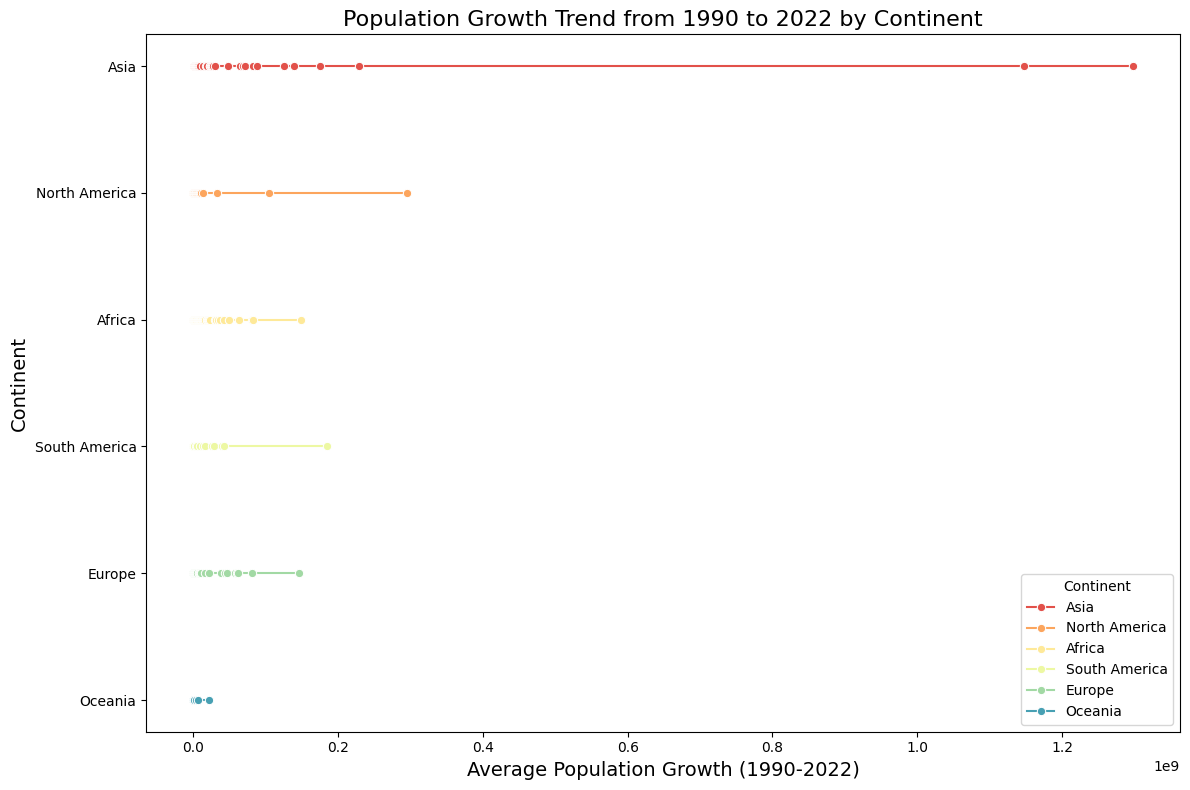

In [45]:
# Line plot for population growth over time for each continent
plt.figure(figsize=(12, 8))

# Filter out columns related to population growth over different years
years = ['Population_1990', 'Population_2000', 'Population_2010', 'Population_2022']
df['Growth_Trend'] = df[years].mean(axis=1)

# Plot the line plot
sns.lineplot(data=df, x='Growth_Trend', y='Continent', hue='Continent', marker='o', palette='Spectral')
plt.title('Population Growth Trend from 1990 to 2022 by Continent', fontsize=16)
plt.xlabel('Average Population Growth (1990-2022)', fontsize=14)
plt.ylabel('Continent', fontsize=14)
plt.tight_layout()
plt.show()


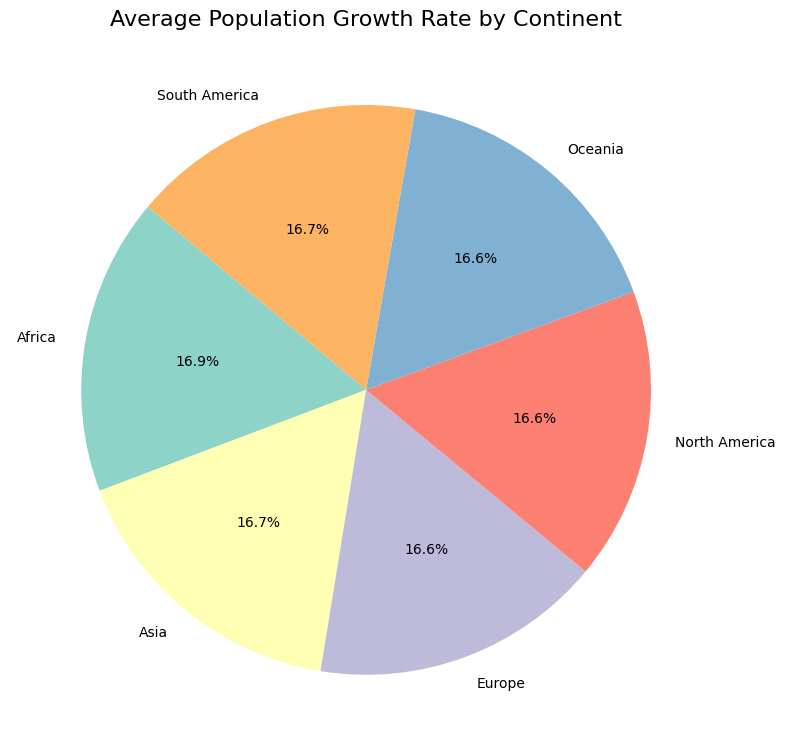

In [46]:
# Distribution of Population Growth Rate Across Continents (Pie Chart)
continent_growth_rate = df.groupby('Continent')['Growth_Rate'].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
continent_growth_rate.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3', len(continent_growth_rate)), startangle=140)
plt.title('Average Population Growth Rate by Continent', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


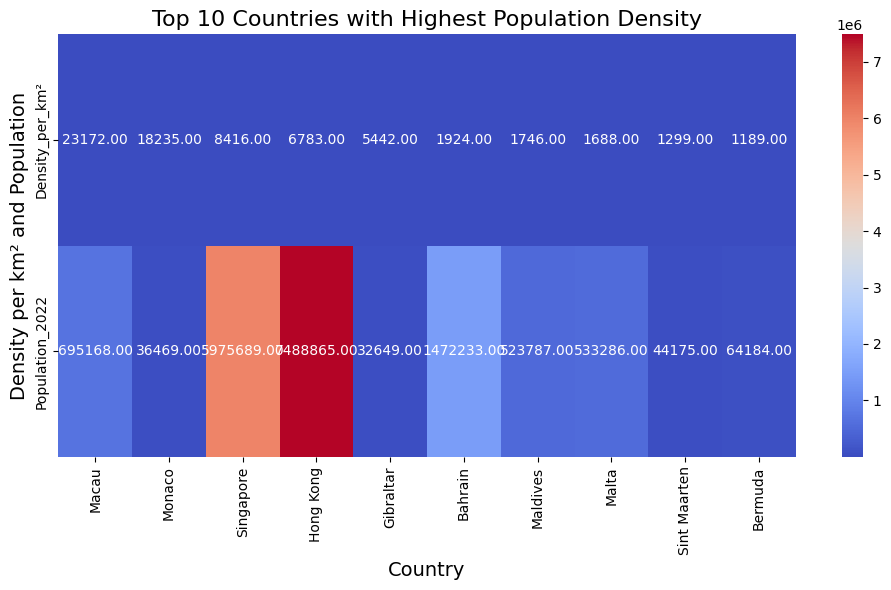

In [47]:
# Top 10 Countries with the Highest Population Density
top_density_countries = df.nlargest(10, 'Density_per_km²')[['Country/Territory', 'Density_per_km²', 'Population_2022']]

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_density_countries.set_index('Country/Territory').T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Countries with Highest Population Density', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Density per km² and Population', fontsize=14)
plt.tight_layout()
plt.show()


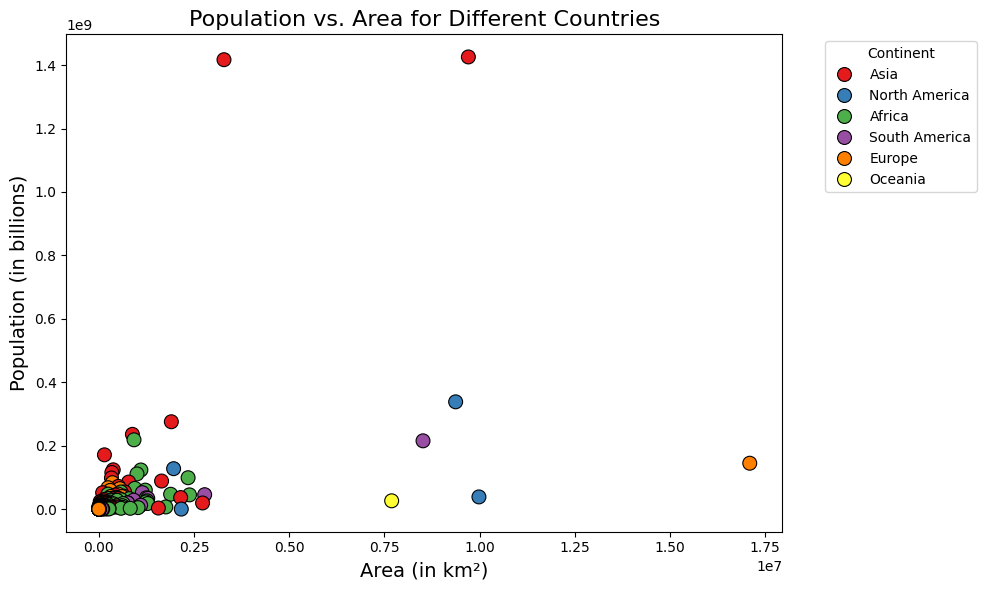

In [48]:
# Relationship Between Population and Area
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area_km²', y='Population_2022', hue='Continent', palette='Set1', s=100, edgecolor='black')
plt.title('Population vs. Area for Different Countries', fontsize=16)
plt.xlabel('Area (in km²)', fontsize=14)
plt.ylabel('Population (in billions)', fontsize=14)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


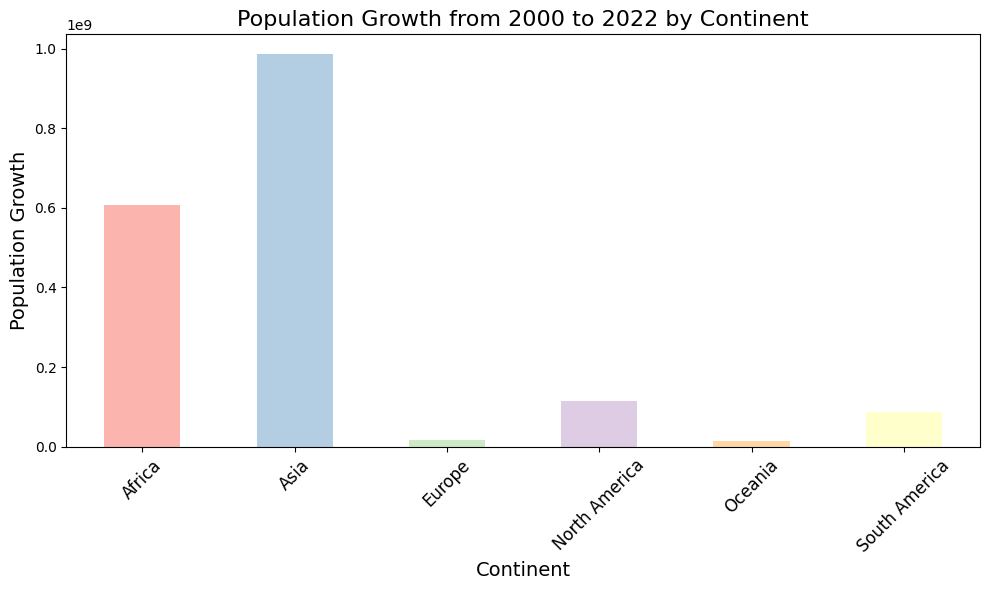

In [49]:
# Calculate population growth from 2000 to 2022 for each continent
df['Population_Growth_2000_2022'] = df['Population_2022'] - df['Population_2000']
continent_growth_2000_2022 = df.groupby('Continent')['Population_Growth_2000_2022'].sum()

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
continent_growth_2000_2022.plot(kind='bar', stacked=True, color=sns.color_palette('Pastel1', len(continent_growth_2000_2022)))
plt.title('Population Growth from 2000 to 2022 by Continent', fontsize=16)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Population Growth', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\tirth\AppData\Local\Temp\ipykernel_1932\2283216466.py:12: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=growth_rates.T, dashes=False, markers='o', palette='Set2')


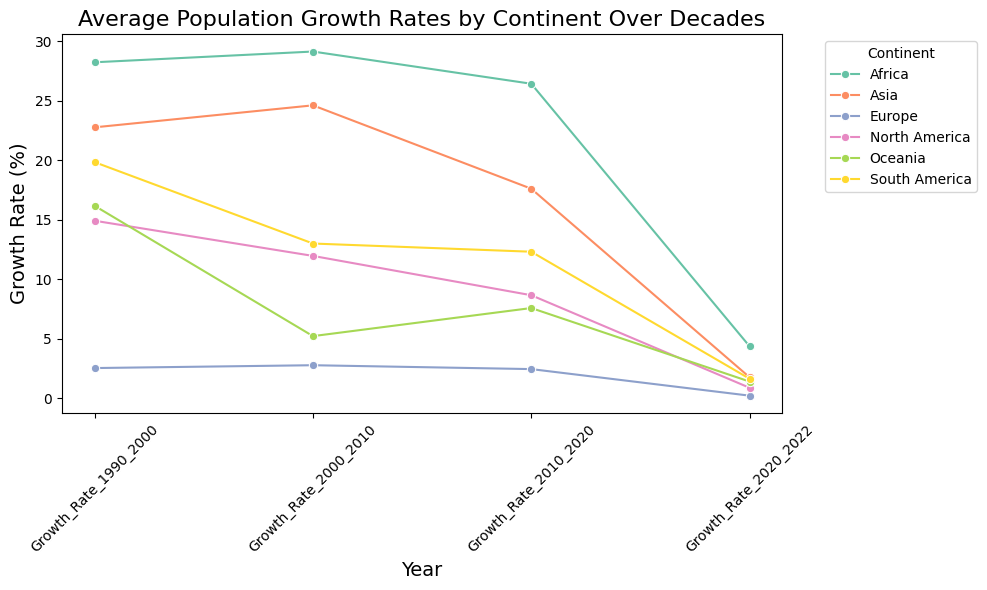

In [50]:
# Calculate average growth rates for each continent over different decades
df['Growth_Rate_1990_2000'] = ((df['Population_2000'] - df['Population_1990']) / df['Population_1990']) * 100
df['Growth_Rate_2000_2010'] = ((df['Population_2010'] - df['Population_2000']) / df['Population_2000']) * 100
df['Growth_Rate_2010_2020'] = ((df['Population_2020'] - df['Population_2010']) / df['Population_2010']) * 100
df['Growth_Rate_2020_2022'] = ((df['Population_2022'] - df['Population_2020']) / df['Population_2020']) * 100

# Average growth rate per continent over these decades
growth_rates = df.groupby('Continent')[['Growth_Rate_1990_2000', 'Growth_Rate_2000_2010', 'Growth_Rate_2010_2020', 'Growth_Rate_2020_2022']].mean()

# Plotting the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=growth_rates.T, dashes=False, markers='o', palette='Set2')
plt.title('Average Population Growth Rates by Continent Over Decades', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Growth Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
